# Customer Segmentation & Market Basket Analysis project:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_excel("Online Retail.xlsx")

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.tail()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.shape

(541909, 8)

In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# handling missing value
df=df.dropna(subset=['CustomerID'])


In [12]:
df=df[df['Quantity']>0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [13]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
# creating usefull features
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')

In [16]:
df['TotalAmount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalAmount, Length: 397924, dtype: float64

In [17]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [18]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397924.000000,397924,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-07-10 23:43:36.912475648,3.116174,15294.315171,22.394749
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.420210,NaN,22.096788,1713.169877,309.055588


In [19]:
#  summary statics 

print("Unique customers",df['CustomerID'].nunique())


Unique customers 4339


In [20]:
print("Unique Products:", df['Description'].nunique())

Unique Products: 3877


In [21]:
print("Unique Countries:", df['Country'].nunique())

Unique Countries: 37


C:\Users\Rutuja\AppData\Local\Temp\ipykernel_55172\1937271552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


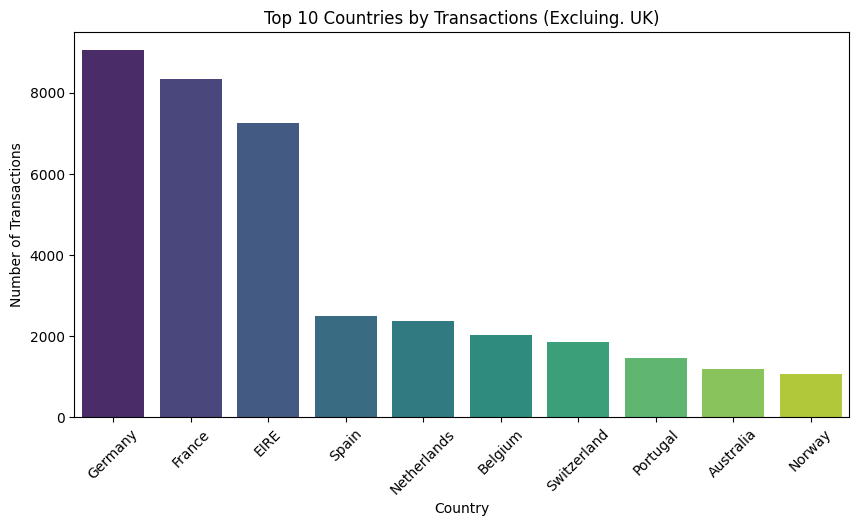

In [22]:
# top 10 country where sales happen
country_counts = df['Country'].value_counts().drop('United Kingdom').head(10)

plt.figure(figsize=(10,5))

sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")
plt.title("Top 10 Countries by Transactions (Excluing. UK)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()


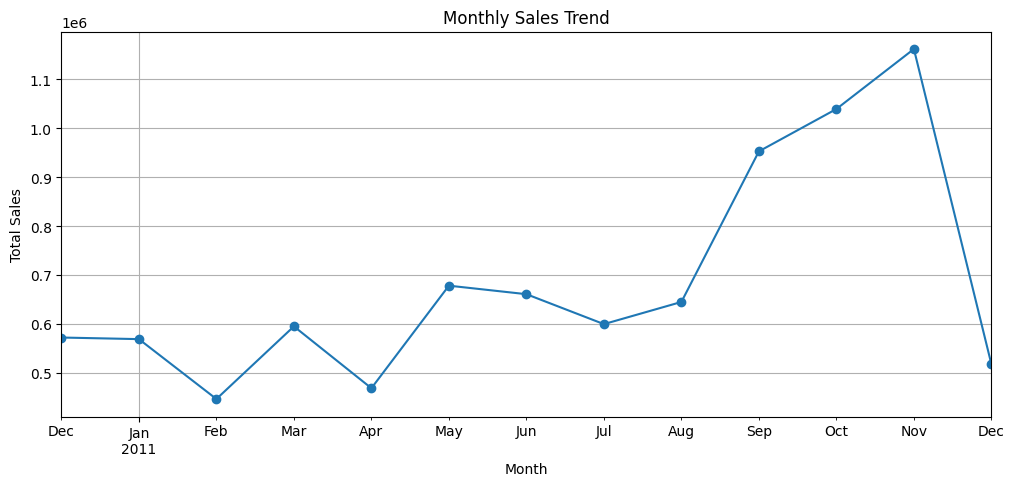

In [23]:
# monthly sales trend
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalAmount'].sum()

plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.grid(True)
plt.show()


C:\Users\Rutuja\AppData\Local\Temp\ipykernel_55172\3131070494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="mako")


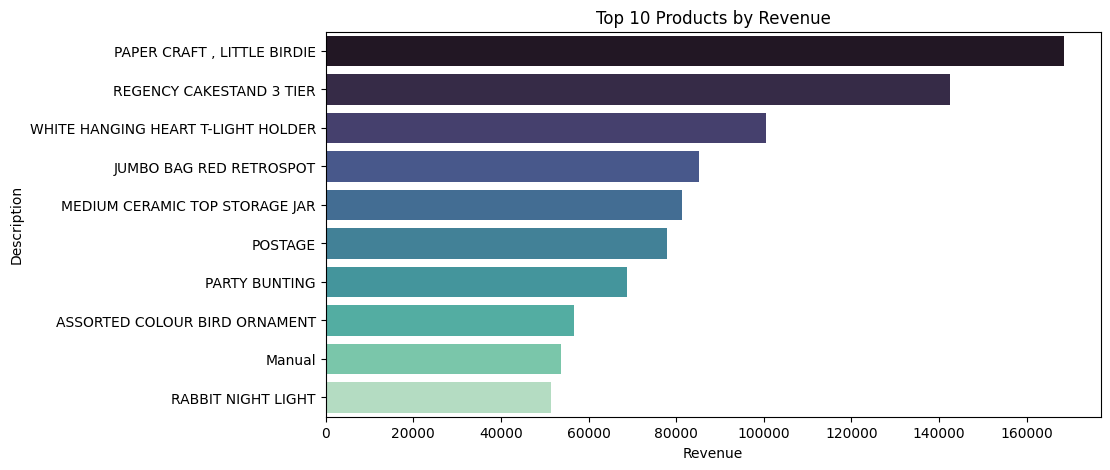

In [24]:
# Step 8: Top 10 products by revenue
top_products = df.groupby('Description')['TotalAmount'].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="mako")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.show()


C:\Users\Rutuja\AppData\Local\Temp\ipykernel_55172\2553372491.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(customer_spending, bins=50, kde=True, palette="mako")


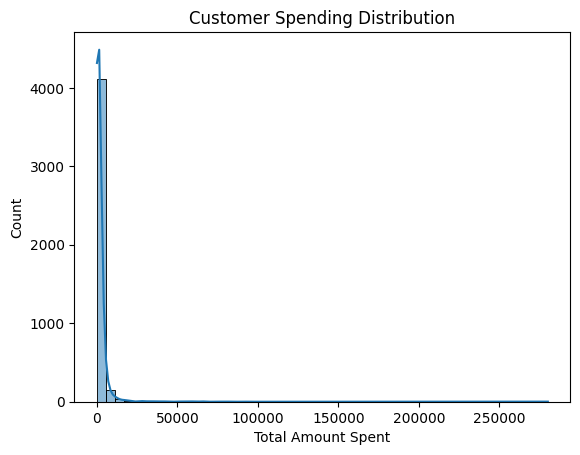

In [25]:
# Step 9: Average spending per customer
customer_spending = df.groupby('CustomerID')['TotalAmount'].sum()
sns.histplot(customer_spending, bins=50, kde=True, palette="mako")
plt.title("Customer Spending Distribution")
plt.xlabel("Total Amount Spent")
plt.show()

In [26]:
# customer Segmentation (k-means) 
# 1 prepare RFM Features (Receny , FRequncy monetary)
from datetime import timedelta

#refernce date = last invoice date

ref_date = df['InvoiceDate'].max()+timedelta(days = 1)

rfm = df.groupby("CustomerID").agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                             # Frequency
    'TotalAmount': 'sum'                                # Monetary
}).reset_index()
    

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40


In [27]:
# 2 normaliseing data
from sklearn.preprocessing import StandardScaler



In [28]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

# If we don’t scale, K-Means will give too much importance to Monetary (because it’s bigger numbers).
# computes scaling parameters (mean, std) and applies them.

In [29]:
# apply k means

from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=42,n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [30]:
# Analyze clusters
# computes summary statistics per cluster:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'CustomerID':'count'
}).rename(columns={'CustomerID':'NumCustomers'}).reset_index()

print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster     Recency  Frequency       Monetary  NumCustomers
0        0   15.672986  22.047393   12453.225924           211
1        1  248.564030   1.551789     478.107581          1062
2        2    7.384615  82.692308  127338.313846            13
3        3   43.910580   3.655748    1349.698298          3053


Cluster 3 → Very recent, high frequency, high spend → ⭐ "Champions".

Cluster 1 → Recent, good frequency, decent spend → "Loyal Customers".

Cluster 2 → Not recent, moderate frequency, moderate spend → "At Risk".

Cluster 0 → Old, low frequency, low spend → "Lost Customers".

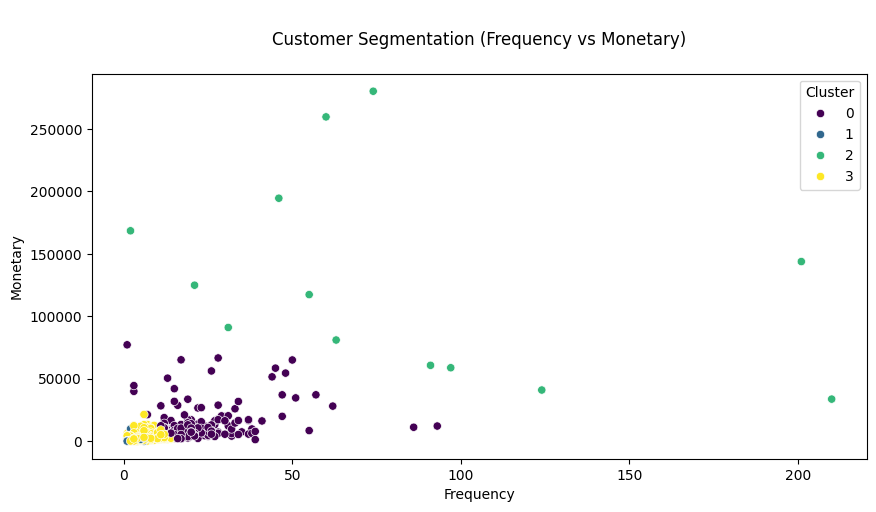

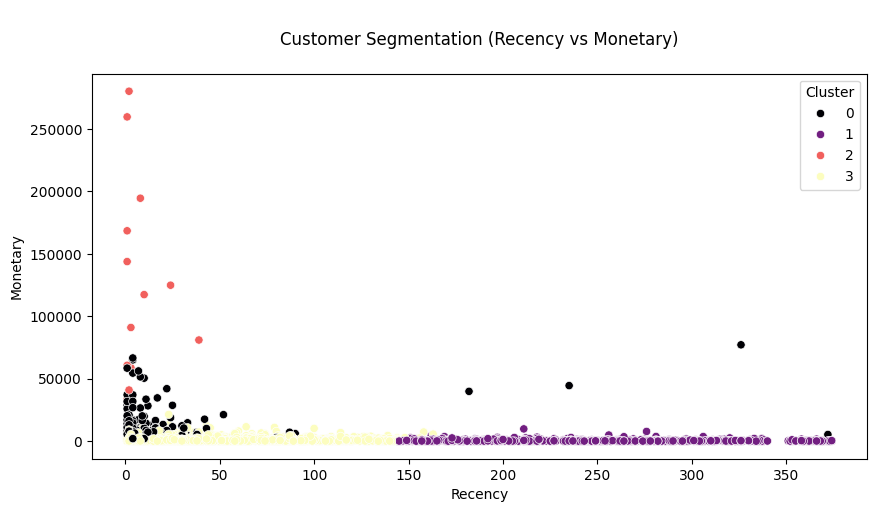

In [31]:
# visulaize the clusters

# Frequency vs Monetary
plt.figure(figsize=(10,5))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm, palette="viridis")
plt.title("\nCustomer Segmentation (Frequency vs Monetary)\n")
plt.show()

# Recency vs Monetary
plt.figure(figsize=(10,5))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette="magma")
plt.title("\nCustomer Segmentation (Recency vs Monetary)\n")
plt.show()

#market Basket Analysis

# step1 create basket (Invoice x product matrix)
Market Basket Analysis (MBA) is a data mining technique used to find which products are often bought together.

Step 1: Build a Basket Matrix

In [45]:
# dfm = pd.read_csv('Market_Basket_Optimisation.csv')

In [48]:
basket = (df.groupby(['InvoiceNo','Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0))

In [47]:
from mlxtend.frequent_patterns import apriori, association_rules

 Step 2: Convert to binary (0/1)

In [34]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
# 1 → product bought

# 0 → product not bought

# Now we have a transaction–product matrix in 0/1 for

C:\Users\Rutuja\AppData\Local\Temp\ipykernel_55172\640119574.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [35]:
#  Step 3: Find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
print("\nFrequent Itemsets:")
print(frequent_itemsets.head())

C:\Users\Rutuja\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Frequent Itemsets:
    support                           itemsets
0  1.000000                        (InvoiceNo)
1  0.021688         (3 STRIPEY MICE FELTCRAFT)
2  0.039167           (6 RIBBONS RUSTIC CHARM)
3  0.025140  (60 CAKE CASES VINTAGE CHRISTMAS)
4  0.035445      (60 TEATIME FAIRY CAKE CASES)


In [36]:
#  Step 4: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("\nTop Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top Rules:
                         antecedents                        consequents  \
0                        (InvoiceNo)         (3 STRIPEY MICE FELTCRAFT)   
1         (3 STRIPEY MICE FELTCRAFT)                        (InvoiceNo)   
2                        (InvoiceNo)           (6 RIBBONS RUSTIC CHARM)   
3           (6 RIBBONS RUSTIC CHARM)                        (InvoiceNo)   
4                        (InvoiceNo)  (60 CAKE CASES VINTAGE CHRISTMAS)   
5  (60 CAKE CASES VINTAGE CHRISTMAS)                        (InvoiceNo)   
6                        (InvoiceNo)      (60 TEATIME FAIRY CAKE CASES)   
7      (60 TEATIME FAIRY CAKE CASES)                        (InvoiceNo)   
8                        (InvoiceNo)   (72 SWEETHEART FAIRY CAKE CASES)   
9   (72 SWEETHEART FAIRY CAKE CASES)                        (InvoiceNo)   

    support  confidence  lift  
0  0.021688    0.021688   1.0  
1  0.021688    1.000000   1.0  
2  0.039167    0.039167   1.0  
3  0.039167    1.000000   1.0  
4 

C:\Users\Rutuja\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


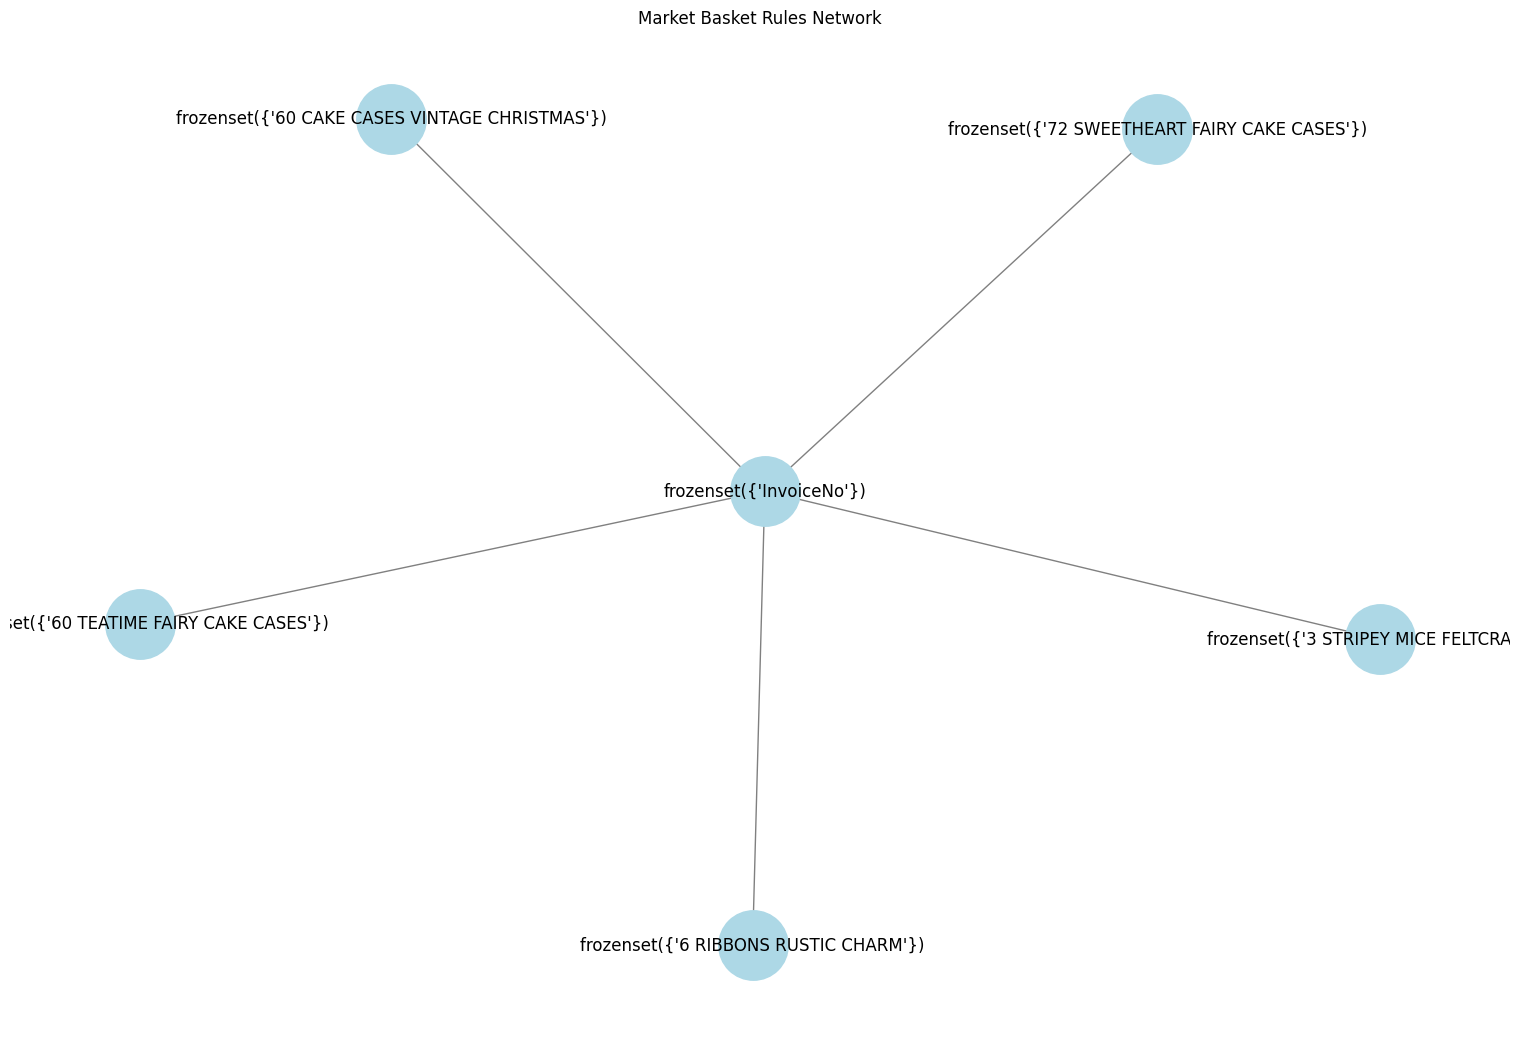

In [37]:
import networkx as nx


G = nx.from_pandas_edgelist(rules.head(10), 'antecedents', 'consequents')
plt.figure(figsize=(15,10))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=2500, edge_color="gray")
plt.title("Market Basket Rules Network")
plt.show()

In [38]:
# pip install networkx

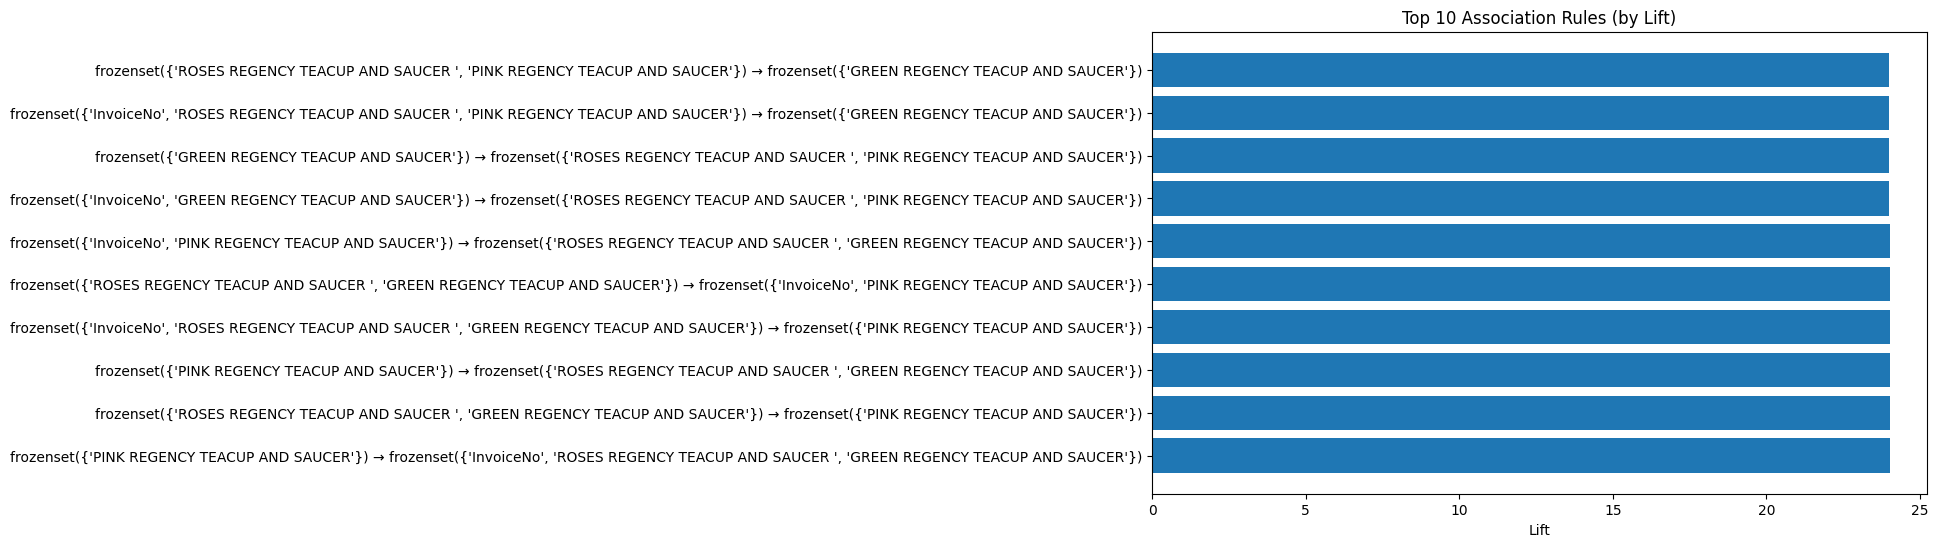

In [39]:
# visulize customer segment
top_rules = rules.sort_values("lift", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_rules['antecedents'].astype(str) + " → " + top_rules['consequents'].astype(str), top_rules['lift'])
plt.xlabel("Lift")
plt.title("Top 10 Association Rules (by Lift)")
plt.show()

In [40]:
rules.to_csv("market_basket_rules.csv", index=False)
cluster_summary.to_csv("customer_segments.csv", index=False)


In [41]:
# import mysql.connector

In [42]:
# !pip install mysql-connector-python
